<img src = excelrlogo.png/>

### ASSIGNMENT-09 -- ASSOSIATION RULES

#### PROBLEM STATEMENTS--- my_movies

Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

In [35]:
import numpy as np
import pandas as pd

In [36]:
my_movies = pd.read_csv("my_movies.csv")
my_movies

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [38]:
my_movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


#### EXPLORATORY DATA ANALYSIS

In [39]:
my_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [40]:
my_movies.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
my_movies.shape

(10, 15)

#### Get list of categorical variables

In [42]:
s = (my_movies.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['V1', 'V2', 'V3', 'V4', 'V5']


In [43]:
my_movies = my_movies.iloc[:,5:15]
my_movies.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


#### APRIORI ALGORITHM

!pip install mlxtend

In [45]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets_ap = apriori(my_movies, min_support=0.15, use_colnames=True,verbose=1)
print(frequent_itemsets_ap.head())

Processing 27 combinations | Sampling itemset size 3
   support         itemsets
0      0.6    (Sixth Sense)
1      0.7      (Gladiator)
2      0.2          (LOTR1)
3      0.2  (Harry Potter1)
4      0.6        (Patriot)


C:\Users\gk521\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [46]:
frequent_itemsets_ap.sort_values("support", ascending = False).shape

(13, 2)

In [47]:
rules_ap = association_rules(frequent_itemsets_ap, metric="confidence", min_threshold=0.1)
print(rules_ap.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.7                 0.6   
1  (Sixth Sense)    (Gladiator)                 0.6                 0.7   
2      (Patriot)  (Sixth Sense)                 0.6                 0.6   
3  (Sixth Sense)      (Patriot)                 0.6                 0.6   
4   (Green Mile)  (Sixth Sense)                 0.2                 0.6   

   support  confidence      lift  leverage  conviction  zhangs_metric  
0      0.5    0.714286  1.190476      0.08         1.4       0.533333  
1      0.5    0.833333  1.190476      0.08         1.8       0.400000  
2      0.4    0.666667  1.111111      0.04         1.2       0.250000  
3      0.4    0.666667  1.111111      0.04         1.2       0.250000  
4      0.2    1.000000  1.666667      0.08         inf       0.500000  


In [48]:
rules_ap[(rules_ap.support > 0.015) & (rules_ap.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(15, 10)

In [49]:
rules_ap['lhs items'] = rules_ap['antecedents'].apply(lambda x:len(x) )
rules_ap[rules_ap['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


In [52]:
my_movies = pd.DataFrame({
    'TransactionID': [1, 2, 3, 4],
    'Sixth Sense': [1, 0, 0, 1],
    'Gladiator': [1, 1, 0, 0],
    'LOTR': [0, 1, 1, 0],
})

In [53]:
my_movies.set_index('TransactionID', inplace=True)

In [54]:
my_movies = my_movies.applymap(lambda x: 1 if x == 1 else 0)

In [55]:
frequent_itemsets_apr = apriori(my_movies, min_support=0.15, use_colnames=True, verbose=1)
print(frequent_itemsets_apr.head())

Processing 3 combinations | Sampling itemset size 3
   support                  itemsets
0     0.50             (Sixth Sense)
1     0.50               (Gladiator)
2     0.50                    (LOTR)
3     0.25  (Gladiator, Sixth Sense)
4     0.25         (Gladiator, LOTR)


C:\Users\gk521\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [56]:
frequent_itemsets_apr.sort_values("support", ascending = False)

,support,itemsets
0,0.50,(Sixth Sense)
1,0.50,(Gladiator)
2,0.50,(LOTR)
3,0.25,"(Gladiator, Sixth Sense)"
4,0.25,"(Gladiator, LOTR)"


In [58]:
from mlxtend.frequent_patterns import association_rules
rules_apr = association_rules(frequent_itemsets_apr, metric= "confidence", min_threshold=0.4)
print(rules_apr.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.5                 0.5   
1  (Sixth Sense)    (Gladiator)                 0.5                 0.5   
2    (Gladiator)         (LOTR)                 0.5                 0.5   
3         (LOTR)    (Gladiator)                 0.5                 0.5   

   support  confidence  lift  leverage  conviction  zhangs_metric  
0     0.25         0.5   1.0       0.0         1.0            0.0  
1     0.25         0.5   1.0       0.0         1.0            0.0  
2     0.25         0.5   1.0       0.0         1.0            0.0  
3     0.25         0.5   1.0       0.0         1.0            0.0  


In [59]:
rules_apr = association_rules(frequent_itemsets_apr, metric= "confidence", min_threshold=0.4)
print(rules_apr.shape)

(4, 10)


In [60]:
rules_apr[(rules_apr.support > 0.015) & (rules_apr.confidence > 0.4)].sort_values("confidence", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.5,0.5,0.25,0.5,1.0,0.0,1.0,0.0
1,(Sixth Sense),(Gladiator),0.5,0.5,0.25,0.5,1.0,0.0,1.0,0.0
2,(Gladiator),(LOTR),0.5,0.5,0.25,0.5,1.0,0.0,1.0,0.0
3,(LOTR),(Gladiator),0.5,0.5,0.25,0.5,1.0,0.0,1.0,0.0


In [61]:
rules_apr['lhs items'] = rules_apr['antecedents'].apply(lambda x:len(x) )
rules_apr[rules_apr['lhs items']>1].sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items


In [62]:
rules_apr['antecedents_'] = rules_apr['antecedents'].apply(lambda a: ','.join(list(a)))
rules_apr['consequents_'] = rules_apr['consequents'].apply(lambda a: ','.join(list(a)))

#### Transform the DataFrame of rules into a matrix using the confidence metric

In [64]:
print(rules_apr.head())

     antecedents    consequents  antecedent support  consequent support  \
0    (Gladiator)  (Sixth Sense)                 0.5                 0.5   
1  (Sixth Sense)    (Gladiator)                 0.5                 0.5   
2    (Gladiator)         (LOTR)                 0.5                 0.5   
3         (LOTR)    (Gladiator)                 0.5                 0.5   

   support  confidence  lift  leverage  conviction  zhangs_metric  lhs items  \
0     0.25         0.5   1.0       0.0         1.0            0.0          1   
1     0.25         0.5   1.0       0.0         1.0            0.0          1   
2     0.25         0.5   1.0       0.0         1.0            0.0          1   
3     0.25         0.5   1.0       0.0         1.0            0.0          1   

  antecedents_ consequents_  
0    Gladiator  Sixth Sense  
1  Sixth Sense    Gladiator  
2    Gladiator         LOTR  
3         LOTR    Gladiator  


In [65]:
pivot = rules_apr[rules_apr['lhs items'] > 1].pivot(index='antecedents', columns='consequents', values='confidence')

#### Generate a heatmap with annotations 

In [67]:
print(pivot.isnull().sum())

Series([], dtype: float64)


In [72]:
rules_ap_li = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.8)
print(rules_ap_li.shape)

(16, 10)


In [73]:
rules_ap_li['lhs items'] = rules_ap_li['antecedents'].apply(lambda x:len(x) )
rules_ap_li[rules_ap_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
12,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.50,2
11,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.50,2
10,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.25,2


#### Replace frozen sets with strings

In [75]:
rules_ap_li['antecedents_'] = rules_ap_li['antecedents'].apply(lambda a: ','.join(list(a)))
rules_ap_li['consequents_'] = rules_ap_li['consequents'].apply(lambda a: ','.join(list(a)))

#### Transform the DataFrame of rules into a matrix using the lift metric

In [76]:
pivot = rules_ap_li[rules_ap_li['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

#### Generate a heatmap with annotations on and the colorbar off

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Gladiator'),
  Text(1.5, 0, 'Patriot'),
  Text(2.5, 0, 'Sixth Sense')])

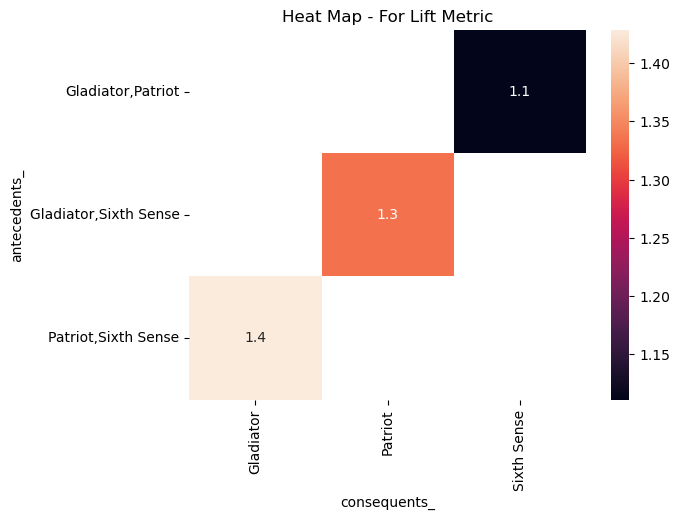

In [77]:
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Lift Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)

#### FpGrowth Algorithm

In [80]:
from mlxtend.frequent_patterns import fpgrowth
frequent_itemsets_fp = fpgrowth(my_movies, min_support=0.1, use_colnames=True,verbose=1)
print(frequent_itemsets_fp.shape)

3 itemset(s) from tree conditioned on items ()
1 itemset(s) from tree conditioned on items (Gladiator)
1 itemset(s) from tree conditioned on items (Sixth Sense)
0 itemset(s) from tree conditioned on items (LOTR)
(5, 2)


C:\Users\gk521\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [81]:
frequent_itemsets_fp.sort_values("support", ascending = False).head()

,support,itemsets
0,0.50,(Gladiator)
1,0.50,(Sixth Sense)
2,0.50,(LOTR)
3,0.25,"(Gladiator, LOTR)"
4,0.25,"(Gladiator, Sixth Sense)"


In [82]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.8)
print(rules_fp.head())

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [83]:
rules_fp[(rules_fp.support > 0.1) & (rules_fp.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(0, 10)

In [84]:
rules_fp['lhs items'] = rules_fp['antecedents'].apply(lambda x:len(x) )
rules_fp[rules_fp['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items


In [85]:
rules_fp['antecedents_'] = rules_fp['antecedents'].apply(lambda a: ','.join(list(a)))
rules_fp['consequents_'] = rules_fp['consequents'].apply(lambda a: ','.join(list(a)))

#### Transform the DataFrame of rules into a matrix using the confidence metric

In [86]:
pivot = rules_fp[rules_fp['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')

#### Generate a heatmap with annotations 

In [88]:
rules_fp_li = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.8)
print(rules_fp_li.shape)

(4, 10)


In [89]:
rules_fp_li['lhs items'] = rules_fp_li['antecedents'].apply(lambda x:len(x) )
rules_fp_li[rules_fp_li['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items


### CONCLUSION

- We applied the Apriori and FP-Growth algorithms to discover association rules within the "book" dataset. We experimented with different minimum support and confidence thresholds to observe their impact on the number and quality of generated rules.

+ For the Apriori algorithm, we observed that adjusting the support and confidence thresholds led to varying numbers of rules. Higher support values resulted in fewer rules, while higher confidence thresholds led to more stringent rules with higher confidence levels.

- We also have explored the influence of the minimum length parameter in the Apriori algorithm. By setting this parameter, we controlled the minimum number of items in a rule, which affected the complexity of the discovered rules.

+ We visualized the discovered rules using heatmaps for both confidence and lift metrics. These visualizations provided insights into the relationships between different items in the dataset, highlighting strong associations between certain items.

## Thank You!